In [32]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.neighbors
import matplotlib.pyplot as plt

In [33]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test-full.csv')
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [34]:
data = train_df.T.to_dict()

In [35]:
train_df_input = train_df.drop(['Id', 'Cover_Type'], axis=1)
train_df_input.values.sum(0)

array([41559587,  2356218,   250338,  3453053,   775833, 25975823,
        3220996,  3309250,  2033294, 23093650,     3568,      569,
           6302,     4681,      339,      627,     1006,      839,
            181,      679,        1,        2,        4,     2096,
            376,      260,      513,      173,        0,      106,
            640,       44,       53,      132,       10,      332,
            742,      265,        6,       48,        8,        7,
           1308,      736,      304,      663,      619,       18,
            103,       14,       32,      744,      634,      456],
      dtype=int64)

In [36]:
test_df_input = test_df.drop(['Id'], axis=1)
test_df_input.values.sum(0)

array([1719426752,   90438473,    8194421,  156541027,   26969912,
       1365463383,  123259400,  129750854,   82810631, 1150572966,
           260796,      29884,     253364,      36968,       3031,
             7525,       4823,      12396,       1597,       6575,
              105,        179,       1147,      32634,      12410,
            29971,      17431,        599,          3,       2845,
             3422,       1899,       4021,       9259,        838,
            33373,      57752,      21278,        474,       2589,
             1086,        946,     115247,      30170,      25666,
            52519,      45154,       1611,       1891,        119,
              298,      15573,      13806,       8750], dtype=int64)

In [37]:
train_df_input = train_df_input.drop(train_df_input.columns[28], axis=1)
test_df_input = test_df_input.drop(train_df_input.columns[28], axis=1)

In [38]:
full_train_X = (train_df_input.values - train_df_input.values.mean(0)) / train_df_input.values.std(0)

pca = sklearn.decomposition.PCA(38)
pca.fit(full_train_X)

print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_

0.9001535575171449


array([0.08075539, 0.05679316, 0.0448386 , 0.03786757, 0.03013732,
       0.02613625, 0.02205148, 0.02175329, 0.0216077 , 0.02009287,
       0.02002373, 0.01985319, 0.01977688, 0.01975557, 0.01963692,
       0.01956678, 0.01950504, 0.01941898, 0.01936002, 0.01932531,
       0.01925512, 0.01920685, 0.01918477, 0.01911506, 0.0190629 ,
       0.01904261, 0.0190034 , 0.01897498, 0.01897226, 0.01895094,
       0.01892556, 0.0189068 , 0.01889362, 0.01889126, 0.01888841,
       0.01887919, 0.01887404, 0.01886971])

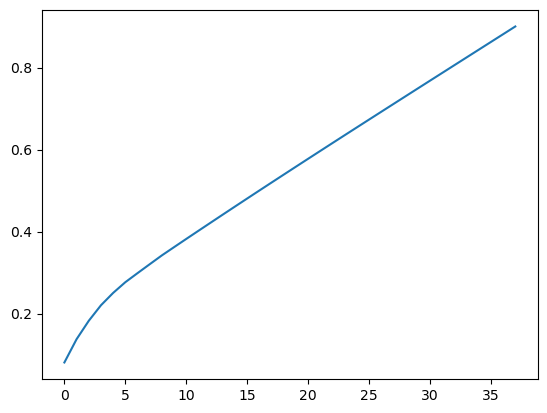

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

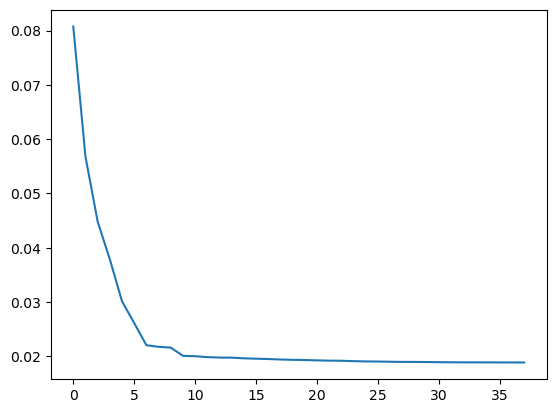

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [41]:
n_splits = 10
n_neighbors = 1
apply_pca = False

kf = sklearn.model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=123456)
all_splits = [i for i in kf.split(train_df_input)]

In [42]:
knn_accuracy = []
for k in range(n_splits):
    train_indexes, val_indexes = all_splits[k]

    train_X = train_df_input.iloc[train_indexes].values
    train_X = (train_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    train_y = train_df.iloc[train_indexes]['Cover_Type'].values - 1

    val_X = train_df_input.iloc[val_indexes].values
    val_X = (val_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    val_y = train_df.iloc[val_indexes]['Cover_Type'].values - 1

    if apply_pca:
        train_X = pca.transform(train_X)
        val_X = pca.transform(val_X)

    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X, train_y)
    knn_predictions = knn.predict(val_X)
    knn_accuracy.append((knn_predictions == val_y).mean())

print((knn.predict(train_X) == train_y).mean())
sum(knn_accuracy) / len(knn_accuracy)

1.0


0.8095238095238095

In [43]:
ncc_accuracy = []
for k in range(n_splits):
    train_indexes, val_indexes = all_splits[k]

    train_X = train_df_input.iloc[train_indexes].values
    train_X = (train_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    train_y = train_df.iloc[train_indexes]['Cover_Type'].values - 1

    val_X = train_df_input.iloc[val_indexes].values
    val_X = (val_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    val_y = train_df.iloc[val_indexes]['Cover_Type'].values - 1

    if apply_pca:
        train_X = pca.transform(train_X)
        val_X = pca.transform(val_X)

    ncc = sklearn.neighbors.NearestCentroid()
    ncc.fit(train_X, train_y)
    ncc_predictions = ncc.predict(val_X)
    ncc_accuracy.append((ncc_predictions == val_y).mean())

print((ncc.predict(train_X) == train_y).mean())
sum(ncc_accuracy) / len(ncc_accuracy)

0.6036890064667843


0.5998015873015874

In [49]:
svc_accuracy = []
for k in range(n_splits):
    train_indexes, val_indexes = all_splits[k]

    train_X = train_df_input.iloc[train_indexes].values
    train_X = (train_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    train_y = train_df.iloc[train_indexes]['Cover_Type'].values - 1

    val_X = train_df_input.iloc[val_indexes].values
    val_X = (val_X - train_df_input.values.mean(0)) / train_df_input.values.std(0)
    val_y = train_df.iloc[val_indexes]['Cover_Type'].values - 1

    if apply_pca:
        train_X = pca.transform(train_X)
        val_X = pca.transform(val_X)

    svc = sklearn.svm.SVC()
    svc.fit(train_X, train_y)
    svc_predictions = svc.predict(val_X)
    svc_accuracy.append((svc_predictions == val_y).mean())

print((svc.predict(train_X) == train_y).mean())
sum(svc_accuracy) / len(svc_accuracy)

0.7439006466784245


0.7294973544973544